# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import os
import urllib.request
import zipfile

BASE_DATA_DIR = './data/'

def download_file(url, download_to_dir, delete_old=False):
    '''
    Given a URL and a path to directory, downloads the file the URL points to
    if the file already exists and delete_old is set to True, deletes the file
    before downloading

    Args:
        url (str) : Public URL pointing to a file
        download_to_dir (str) : directory to download the file to. If it doesn't exist
                                it is created.
        delete_old (bool) : Default False, If set to true & the file alredy exists in path
                            its deleted before downloading a new copy
    Returns:
        filepath (str) : Path where the file was downloaded to.
    '''
    if not os.path.exists(download_to_dir):
        os.makedirs(download_to_dir)
    download_path = os.path.join(download_to_dir, url[url.rfind('/') + 1:])

    if os.path.exists(download_path):
        if delete_old:
            os.remove(download_path)
        else:
            return download_path

    urllib.request.urlretrieve(url, download_path)
    return download_path


def extract_zip(filepath, extract_to_dir):
    '''
    Given a zip file path & a target directory extracts the zip contents 
    into the target directory
    Args:
     filepath (str) : Local path to the zipfile
     extract_to_dir (str) : Target path to the zipfile contents.
                            If doesn't exist, its created
    '''
    if not os.path.exists(extract_to_dir):
        os.makedirs(extract_to_dir)

    with zipfile.ZipFile(filepath, 'r') as ref:
        ref.extractall(extract_to_dir)

dataset_url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
downloaded_path = download_file(dataset_url, BASE_DATA_DIR)
extract_zip(downloaded_path, os.path.join(BASE_DATA_DIR, 'pickled_data/'))

In [3]:
# Load pickled data
import pickle
import os


data_dir = os.path.join(BASE_DATA_DIR, 'pickled_data')
training_file = os.path.join(data_dir, 'train.p')
validation_file= os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
del train, test, valid

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

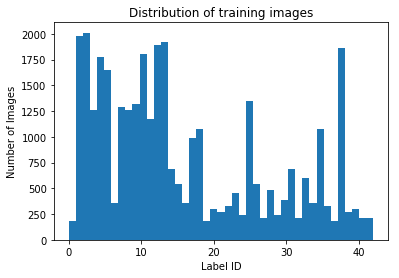

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Lets see how well distributed the training set is.
fig, ax = plt.subplots()
result = ax.hist(y_train, bins=n_classes)
ax.set_xlabel('Label ID')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of training images')

#### The distribution of the training data is very skewed, with some classes have 1000s of images, some classes only have a few hundreds. This will lead to overfitting for classes with large number of image data. Lets fix this by augumenting and generating some fake data so that the training data is well distributed across classes

In [6]:
# Lets read in the labels associated with each id
import csv

lables = {}
label_mappings = 'signnames.csv'
with open(label_mappings, 'r') as csv_file:
    rows = csv.reader(csv_file)
    # Skip header row
    next(rows, None)
    labels = {int(row[0]): row[1] for row in rows}

# Choose a few images of each label randomly to visualize the training set
import random

label_to_train_indices = {}
num_images_to_sample = 3
for i in range(0, n_classes):
    label_to_train_indices[i] = random.sample(np.argwhere(y_train==i).tolist(), num_images_to_sample)
    label_to_train_indices[i] = np.array(label_to_train_indices[i]).flatten()


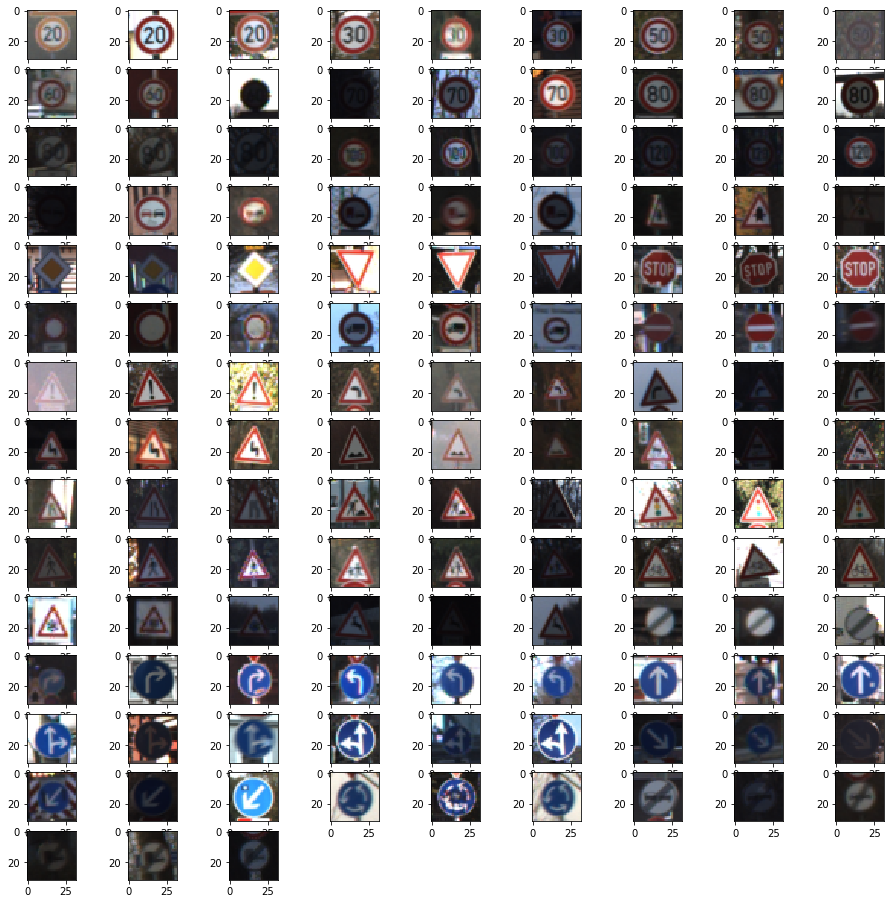

In [7]:
fig = plt.figure(figsize=(16,16))
for i in range(0, n_classes):
    for j in range(0, num_images_to_sample):
        img= X_train[label_to_train_indices[i][j]]
        ax = fig.add_subplot(15, 9, ((i*num_images_to_sample) + j)+1)
        ax.imshow(img.squeeze())
plt.show()



#### Observations
Running the above cell a few times and looking at the test data, there is a lot of variation for the  following factors
* Illumination - Some images are well lit, while some images are almost dark
* Scale of the sign

While CNNs are resistant to slight illumination variations, we can accelerate training a lot by normalizing the images for brightnes. Scale variance in the test data is a good characteristic. This makes the model robust to images captured at different distances.

There is also no variance for the following factors :
* Rotation
* Sheer (affine transformation)
* Placement of the sign with respect to image centre

Almost all the images I observed were upright & sign was parallel to the image plane. This might not be true in real world conditions. To make the model robust to real world conditions, I will try and augument the given images by introducing rotation & random affine transformations

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

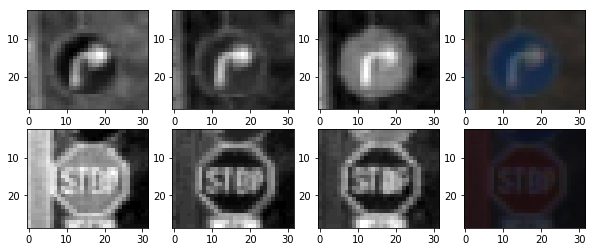

In [8]:
fig, axs = plt.subplots(2, 4, sharex='row', figsize=(10,4), facecolor='w', edgecolor='k')

for i in range(0, 1):
    img= X_train[26250]
    axs[0][3].imshow(img, aspect='equal')
    axs[0][2].imshow(img[:,:,2], cmap='gray',aspect='equal')
    axs[0][1].imshow(img[:,:,1], cmap='gray',aspect='equal')
    axs[0][0].imshow(img[:,:,0], cmap='gray',aspect='equal')

for i in range(0, 1):
    img= X_train[29220]
    axs[1][3].imshow(img, aspect='equal')
    axs[1][2].imshow(img[:,:,2], cmap='gray',aspect='equal')
    axs[1][1].imshow(img[:,:,1], cmap='gray',aspect='equal')
    axs[1][0].imshow(img[:,:,0], cmap='gray',aspect='equal')

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from tqdm import tqdm
from skimage import exposure

# NOTE TO SELF : Going wrong with sigma values ? 
# Change color space to YUV color space to make it easier to adjust brightness without
# changing color features
# def preprocess_image_set(image_set):
#     preprocessed_images = []
#     for image in tqdm(image_set):
#         # Convert image to YUV color space
#         # NOTE : Images provided are in the RGB color space rather than the usual
#         # BGR color space used in OpenCV
#         yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        
#         # normalize the values in the brightness channel, to lie between 0 and 1
#         float_gray = yuv_image[:,:,1].astype(np.float32) / 255.0
        
#         # Attempt localized normalization obtained from the abov
#         blur = cv2.GaussianBlur(float_gray, (0, 0), sigmaX=6, sigmaY=6)
#         num = float_gray - blur

#         blur = cv2.GaussianBlur(num*num, (0, 0), sigmaX=3, sigmaY=3)
#         den = cv2.pow(blur, 0.5)
        
#         gray = num / den
#         gray = cv2.normalize(gray, dst=gray, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX) # TRY L2_NORM ?
#         yuv_image[:,:,1] = gray
#         preprocessed_images.append(yuv_image)
#     return np.array(preprocessed_images)

### While I am not able to choose proper sigma values to attempt the local normalization 
### mentioned in the Sermanet / LeCunn Paper linked above, the following histogram based
### equalization seems to give almost the same result with edges emphasized & illumination 
### equalized - however we lose the color information due to conversion to grayscale
def preprocess_image_set(image_set):
    preprocessed_images = []
    for image in tqdm(image_set):
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        equalized = exposure.equalize_adapthist(gray)
        equalized = cv2.normalize(equalized,dst=equalized, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)
        equalized.shape = (equalized.shape[0],equalized.shape[1], 1)
        preprocessed_images.append(equalized)
    return np.array(preprocessed_images)    
        
normalized_test_data = preprocess_image_set(X_test)
normalized_train_data = preprocess_image_set(X_train)
normalized_valid_data = preprocess_image_set(X_valid)

100%|██████████| 4410/4410 [00:30<00:00, 142.33it/s]


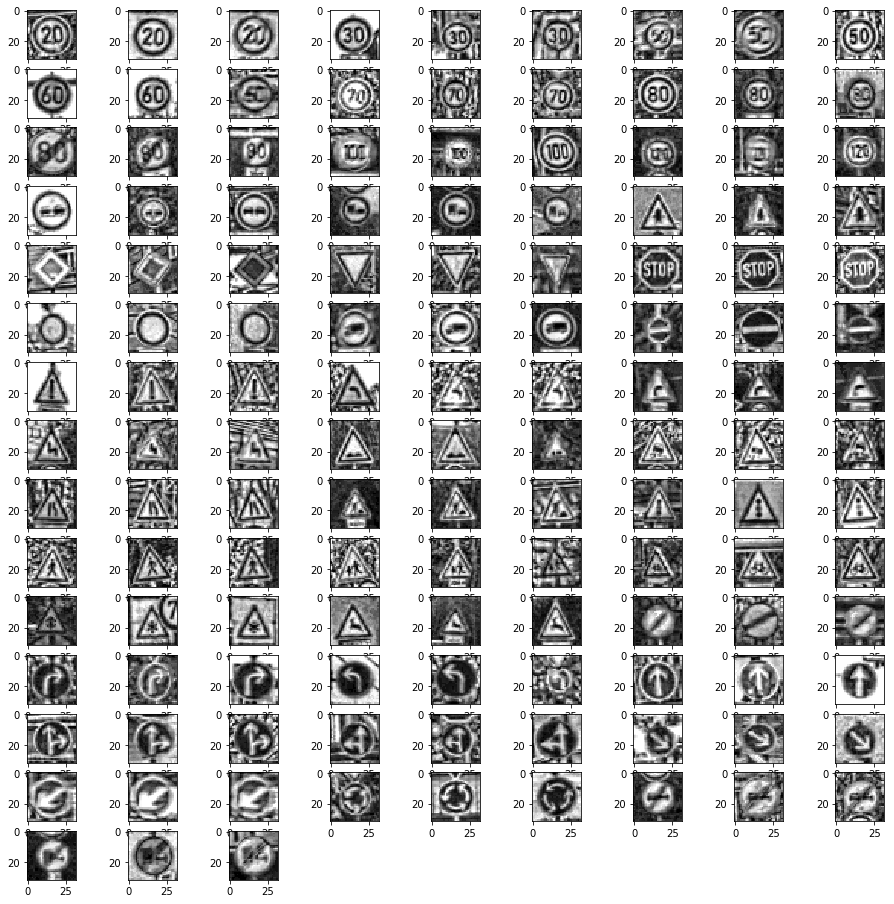

In [8]:
# Visualize Pre processed images with the same indices as the visualized original images

fig = plt.figure(figsize=(16,16))
for i in range(0, n_classes):
    for j in range(0, num_images_to_sample):
        img= normalized_train_data[label_to_train_indices[i][j]]
        ax = fig.add_subplot(15, 9, ((i*num_images_to_sample) + j)+1)
        ax.imshow(img.squeeze(), cmap='gray')
plt.show()


In [10]:
# Try Generating more fake data by augumenting available training images
import keras
from keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(rotation_range=15, width_shift_range=0.06, height_shift_range=0.06,
                                   zoom_range=0.1, shear_range=0.1, fill_mode='nearest', horizontal_flip=False, vertical_flip=False)

total_required_images = 2500

# create empty arrays to store augumented data
augumented_training_data = np.empty((0,32,32,1))
augumented_training_labels = np.empty(0,dtype='uint8')

for i in tqdm(range(n_classes)):
    this_class_images = normalized_train_data[y_train==i]
    this_class_label_ids = y_train[y_train==i]
    
    images_in_class = this_class_images.shape[0]
   
    # create a copy of existing image data (so that we don't modify a reference)
    this_class_augumented_data = np.copy(this_class_images)
    this_class_augumented_label_ids = np.copy(this_class_label_ids)
  
    for X, y in datagenerator.flow(this_class_images, this_class_label_ids,
                                   batch_size=125):
        if this_class_augumented_data.shape[0] > total_required_images:
            break

        this_class_augumented_data = np.append(this_class_augumented_data, X, axis=0)
        this_class_augumented_label_ids = np.append(this_class_augumented_label_ids, y, axis=0)
            
    augumented_training_data = np.append(augumented_training_data, this_class_augumented_data, axis=0)
    augumented_training_labels = np.append(augumented_training_labels, this_class_augumented_label_ids, axis=0)

Using TensorFlow backend.
100%|██████████| 43/43 [00:31<00:00,  1.03s/it]


Total Augumented data (109376, 32, 32, 1)


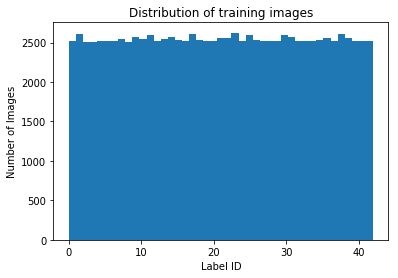

In [11]:
# Lets see how well distributed augumented training set is.
print("Total Augumented data", augumented_training_data.shape)
fig, ax = plt.subplots()
result = ax.hist(augumented_training_labels, bins=n_classes)
ax.set_xlabel('Label ID')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of training images')

### Model Architecture

In [12]:
# Lets try the LeNet architecture
import tensorflow as tf
from tensorflow.contrib.layers import flatten

MU = 0
SIGMA = 0.1

def conv2d_relu(input_features, filter_size, strides=[1,1,1,1], padding_type='VALID', name=''):
    weights = tf.Variable(tf.truncated_normal(shape=filter_size, mean=MU, stddev=SIGMA))
    biases = tf.Variable(tf.zeros(filter_size[3]))
    conv_layer = tf.nn.conv2d(input_features, weights, strides=strides, padding=padding_type) + biases
    conv_relu = tf.nn.relu(conv_layer, name=name)
    return conv_relu


def max_pool(conv_layer, kernel_size, padding_type='VALID'):
    return tf.nn.max_pool(conv_layer, ksize=kernel_size, strides=kernel_size, padding=padding_type)


def conv2d_relu_maxpool(input_features, filter_size, kernel_size, strides=[1,1,1,1], padding='VALID', name=''):
    conv_layer = conv2d_relu(input_features, filter_size, strides, padding, name)
    return max_pool(conv_layer, kernel_size, padding)


def fully_connected(input_layer, num_input_features, num_output_features, name=''):
    weights = tf.Variable(tf.truncated_normal(shape=(num_input_features, num_output_features),
                                              mean = MU, stddev = SIGMA), name=name)
    biases = tf.Variable(tf.zeros(num_output_features))
    fc_layer = tf.matmul(input_layer, weights) + biases
    return fc_layer


def fully_connected_relu(input_layer, num_input_features, num_output_features, name):
    fc_layer = fully_connected(input_layer, num_input_features, num_output_features, name)
    return tf.nn.relu(fc_layer)


def LeNet(x):
    # Input : 32 x 32 x 1 -->  Conv Ouput : 28 x 28 x 6 --> After subsampling 14 x 14 x 6
    layer1 = conv2d_relu_maxpool(x, (5,5,1,6), [1,2,2,1], name='lenet_l1')
    
    # Input: 14 x 14 x 6 --> Output = 10x10x16. --> After subsampling 5 x 5 x 16
    layer2 = conv2d_relu_maxpool(layer1, (5,5,6,16), [1,2,2,1], name='lenet_l2')
    
    fc_layer1 = flatten(layer2)
    # Fully connected layer with non linearities and activation 
    # Input 400, Output 120
    fc_layer2 = fully_connected_relu(fc_layer1, 400, 120, name='lenet_fc1')
    fc_layer2 = tf.nn.dropout(fc_layer2, keep_prob)
    
    # Fully connected layer with non linearities and activation 
    # Input 120, Output 84
    fc_layer3 = fully_connected_relu(fc_layer2, 120, 84, name='lenet_fc2')
    fc_layer3 = tf.nn.dropout(fc_layer3, keep_prob)
    
    # Fully connected layer, Input 84, Output 43 classes
    logits = fully_connected(fc_layer3, 84, n_classes, name='lenet_logits')
    
    return logits

def Sermanet(x):
    # Try architecture mentioned in http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
    # Input : 32 x 32 x 1 -->  Conv Ouput : 28 x 28 x 6 --> After subsampling 14 x 14 x 6
    layer1 = conv2d_relu_maxpool(x, (5,5,1,6), [1,2,2,1], name='sermanet_l1')
    layer1 = tf.nn.dropout(layer1, keep_prob_conv)
    
    # Input: 14 x 14 x 6 --> Output = 10x10x16
    layer_2_conv = conv2d_relu(layer1, (5,5,6,16), name='sermanet_l2')
    # After subsampling 5 x 5 x 16
    layer_2_subsampled = max_pool(layer_2_conv, [1,2,2,1])
    layer_2_subsampled = tf.nn.dropout(layer_2_subsampled, keep_prob_conv)
    
    # Flatten 10 x 10 x 16 to get 1600
    layer_2_conv_flattened = flatten(layer_2_conv) #TODO : Should this be subsampled first ?
    # Flatten 5 x 5 x  16 to get 400
    layer_2_subsampled_flattened = flatten(layer_2_subsampled) 
    
    # append two feature layers to get a linear classifier with 2000 distinct features
    linear_classifier = tf.concat_v2([layer_2_conv_flattened, layer_2_subsampled_flattened], 1)
    linear_classifier = tf.nn.dropout(linear_classifier, keep_prob)
    
    logits = fully_connected(linear_classifier, 2000, n_classes, name='sermanet_logits')
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
learning_rate = 0.001
EPOCHS = 30
BATCH_SIZE = 256

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32) # probability to keep units
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

# logits = LeNet(x)
logits = Sermanet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
## Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # dont drop activations for evaluations
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [15]:
from sklearn.utils import shuffle
from datetime import datetime

X_train, y_train = shuffle(augumented_training_data, augumented_training_labels)



In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    epoch = []
    validation_accuracy_data = []
    training_accuracy_data = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5,  keep_prob_conv:0.75})
        training_accuracy = evaluate(augumented_training_data, augumented_training_labels)    
        validation_accuracy = evaluate(normalized_valid_data, y_valid)
        epoch.append(i+1)
        validation_accuracy_data.append(validation_accuracy)
        training_accuracy_data.append(training_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, os.path.join(BASE_DATA_DIR, './sermanet'))
    print("Model saved")

### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Training Accuracy = 0.804
Validation Accuracy = 0.854

EPOCH 2 ...
Training Accuracy = 0.895
Validation Accuracy = 0.901

EPOCH 3 ...
Training Accuracy = 0.924
Validation Accuracy = 0.925

EPOCH 4 ...
Training Accuracy = 0.947
Validation Accuracy = 0.941

EPOCH 5 ...
Training Accuracy = 0.957
Validation Accuracy = 0.950

EPOCH 6 ...
Training Accuracy = 0.963
Validation Accuracy = 0.954

EPOCH 7 ...
Training Accuracy = 0.968
Validation Accuracy = 0.955

EPOCH 8 ...
Training Accuracy = 0.972
Validation Accuracy = 0.955

EPOCH 9 ...
Training Accuracy = 0.974
Validation Accuracy = 0.959

EPOCH 10 ...
Training Accuracy = 0.977
Validation Accuracy = 0.961

EPOCH 11 ...
Training Accuracy = 0.978
Validation Accuracy = 0.961

EPOCH 12 ...
Training Accuracy = 0.979
Validation Accuracy = 0.967

EPOCH 13 ...
Training Accuracy = 0.979
Validation Accuracy = 0.964

EPOCH 14 ...
Training Accuracy = 0.981
Validation Accuracy = 0.965

EPOCH 15 ...
Training Accuracy = 0.982
Valid

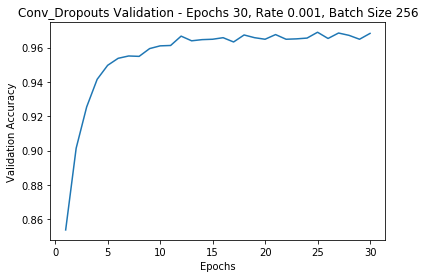

In [17]:
plt.plot(epoch, validation_accuracy_data)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
title= 'Conv_Dropouts Validation - Epochs {}, Rate {}, Batch Size {}'.format(EPOCHS,learning_rate,BATCH_SIZE)
plt.title(title)
file_name = datetime.now().isoformat()[:19] + '_Validation.png'
plt.savefig(file_name)

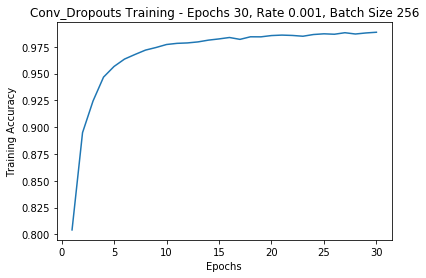

In [18]:
plt.plot(epoch, training_accuracy_data)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
title= 'Conv_Dropouts Training - Epochs {}, Rate {}, Batch Size {}'.format(EPOCHS,learning_rate,BATCH_SIZE)
plt.title(title)
file_name = datetime.now().isoformat()[:19] + '_Training.png'
plt.savefig(file_name)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./sermanet.meta')
    saver.restore(sess, "./sermanet")
    test_accuracy = evaluate(normalized_test_data, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

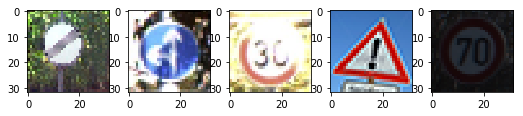

Image 1 - End of all speed and passing limits
Image 2 - Go straight or left
Image 3 - Speed limit (30km/h)
Image 4 - General caution
Image 5 - Speed limit (70km/h)


In [20]:
### Load the images and plot them here.
import cv2
new_img_path = os.paths.join('./docs/new_images/')
new_images = sorted(os.listdir(new_img_path))
images = []
label_ids = [32, 37, 1, 18, 4]
fig = plt.figure(figsize=(16,16))

for i in range(len(new_images)):
    ax = fig.add_subplot(9, 9, i+1)
    image = cv2.imread(os.path.join(new_img_path, new_images[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    images.append(image)
    ax.imshow(image)
#     ax.set_title(labels[label_ids[i]])
plt.show()
for i in range(len(label_ids)):
    print('Image {} - {}'.format(i+1, labels[label_ids[i]]))

100%|██████████| 5/5 [00:00<00:00, 67.93it/s]


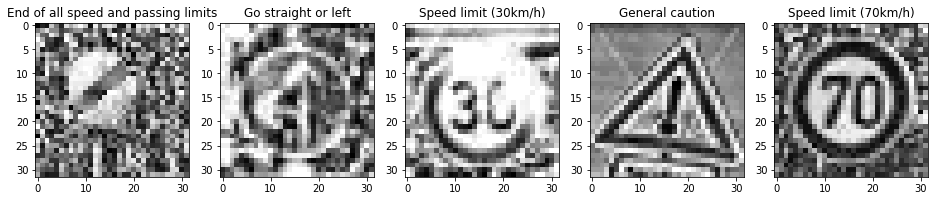

In [21]:
# Normalize input images
normalized_image_data = np.array(preprocess_image_set(images))
label_ids = np.array(label_ids)

fig = plt.figure(figsize=(16,16))
for i in range(len(normalized_image_data)):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(normalized_image_data[i].squeeze(), cmap='gray')
    ax.set_title(labels[label_ids[i]])
plt.show()


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
choosen_image_data = normalized_image_data[:5]
choosen_image_labels = label_ids[:5]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(os.path.join(BASE_DATA_DIR, 'sermanet.meta'))
    saver.restore(sess, os.path.join(BASE_DATA_DIR, 'sermanet'))
    test_accuracy = evaluate(choosen_image_data, choosen_image_labels)
    print("New Images Accuracy = {:.3f}".format(test_accuracy))

New Images Accuracy = 0.800


### Analyze Performance

#### Calculate the accuracy for these 5 new images. 
### The model is able to predict the new images with 100% accuracy


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
predicted_logits = tf.nn.softmax(logits)
top5_predictions = tf.nn.top_k(predicted_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(os.path.join(BASE_DATA_DIR, 'sermanet.meta'))
    saver.restore(sess, os.path.join(BASE_DATA_DIR, 'sermanet'))
    softmax_logits = sess.run(predicted_logits, feed_dict={x:choosen_image_data, keep_prob:1.0, keep_prob_conv:1.0})
    top5 = sess.run(top5_predictions, feed_dict={x:choosen_image_data, keep_prob:1.0, keep_prob_conv:1.0})

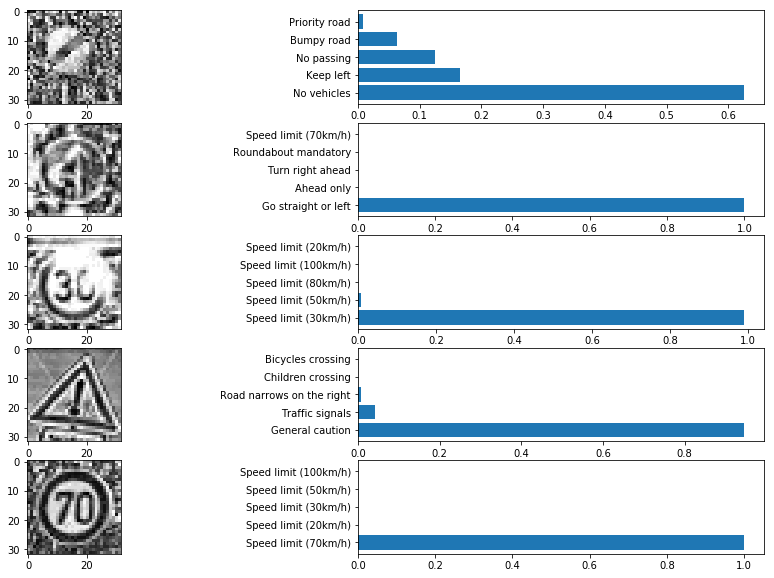

In [24]:
# Visualizing top 5 probabilities
plot_no = 1
fig = plt.figure(figsize=(16,10))

for i in range(len(top5.values)):
    ax = fig.add_subplot(5, 2, plot_no)
    ax.imshow(choosen_image_data[i].squeeze(), cmap='gray')
    plot_no += 1
        
    ax= fig.add_subplot(5,2, plot_no)
    ax.barh(np.arange(5), top5.values[i])
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels([labels[class_id] for class_id in top5.indices[i]])
    plot_no += 1


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for i in range(activation.shape[0]):
        for featuremap in range(featuremaps):
            plt.subplot(activation.shape[0],featuremaps, (i*featuremaps) + featuremap + 1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[i,:,:, featuremap], interpolation="nearest", cmap="gray")


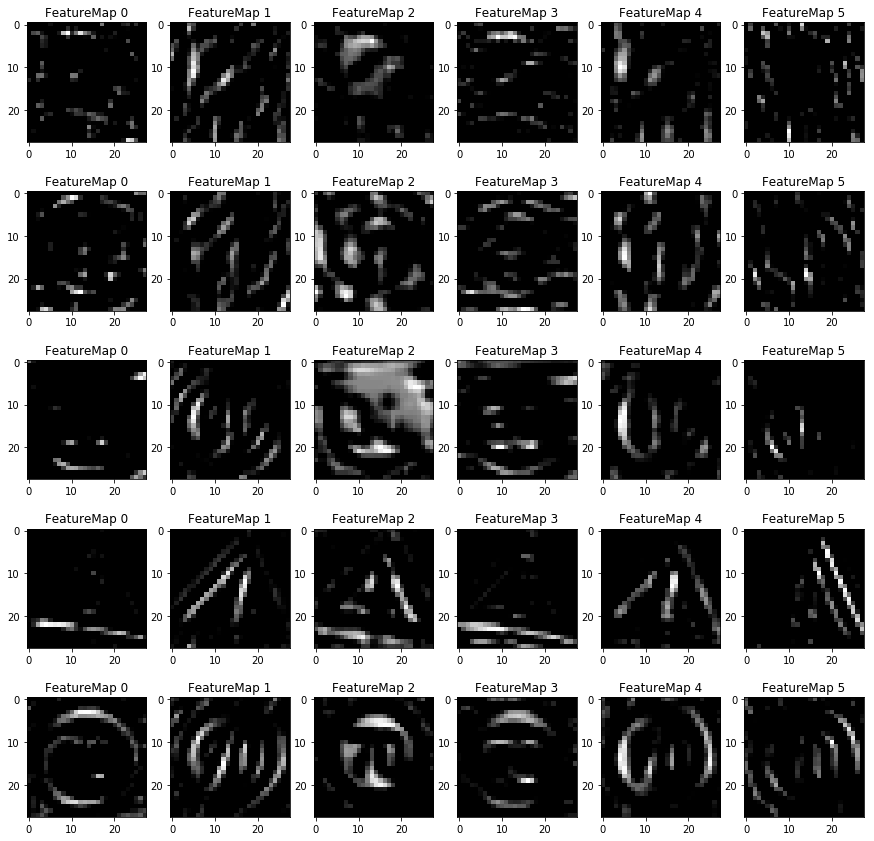

In [26]:

with tf.Session() as sess:
    # Convolution (layer 1 after 'tf.nn.conv2d' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('sermanet_l1:0')
    outputFeatureMap(choosen_image_data, conv1)
    plt.savefig(datetime.now().isoformat()[:19] + '_conv_viz.png')